/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# 1. IMPORTACIÓN DE LIBRERÍAS

Importamos las librerias necesarias para comenzar a trabajar con los datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import joblib
from sklearn import tree
from sklearn.tree import export_text
from xgboost import XGBClassifier
from subprocess import check_call
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc, roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.tree import export_text
from xgboost import XGBClassifier
from subprocess import check_call
from IPython.display import Image as PImage

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import metrics

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# 2. IMPORTACIÓN DE LOS SETS DE DATOS

Importamos la compilación de sets de datos a utilizar y vemos sus primeros registros

In [10]:
import pandas as pd

# Especifica la ruta del archivo CSV
file_path = 'D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv'

# Cargar el CSV en un DataFrame
df_mora_prestamos = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame para verificar la carga
print(df_mora_prestamos.head())

   Suc  Periodo  Segmento  Genero  Antiguedad  TC_Master_Cantidad  \
0   30   202301         1       1          28                   1   
1   30   202301         5       0          20                   0   
2   30   202301         1       0          27                   1   
3   30   202301         3       0          27                   0   
4   30   202301         2       1          24                   1   

   TC_Visa_Cantidad  TC_Visa_SaldoPesos  TC_Tuya_Cantidad  TC_Tuya_SaldoPesos  \
0                 0                0.00                 1           -81954.89   
1                 0                0.00                 0                0.00   
2                 0                0.00                 1                0.00   
3                 1             3876.85                 1           152028.70   
4                 0                0.00                 1           408761.58   

   ...  Tasa_Ponderada  CA_acreditaciones_tukey  CA_SaldoPromedio_$_tukey  \
0  ...           67.4

In [11]:
import pandas as pd

# Supongamos que df_mora_prestamos es tu DataFrame
# Si no has cargado el DataFrame, puedes hacerlo de la siguiente manera:
# df_mora_prestamos = pd.read_csv('tu_archivo.csv')

# Contar la cantidad de registros y variables
num_registros = df_mora_prestamos.shape[0]  # Número de filas
num_variables = df_mora_prestamos.shape[1]  # Número de columnas

# Imprimir los resultados
print(f"Cantidad de registros: {num_registros}")
print(f"Cantidad de variables: {num_variables}")

Cantidad de registros: 1626264
Cantidad de variables: 32


## RANDOM FOREST - TECNICAS DE BALANCEO DE DATOS


Medidas de rendimiento para Sin Balanceo:
ROC-AUC: 0.9992
Precision: 0.9858
Recall: 0.9640
F1-Score: 0.9747
Accuracy: 0.9971

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9978  0.9991    0.9985  459735.0000
1                0.9858  0.9640    0.9747   28145.0000
accuracy         0.9971  0.9971    0.9971       0.9971
macro avg        0.9918  0.9816    0.9866  487880.0000
weighted avg     0.9971  0.9971    0.9971  487880.0000


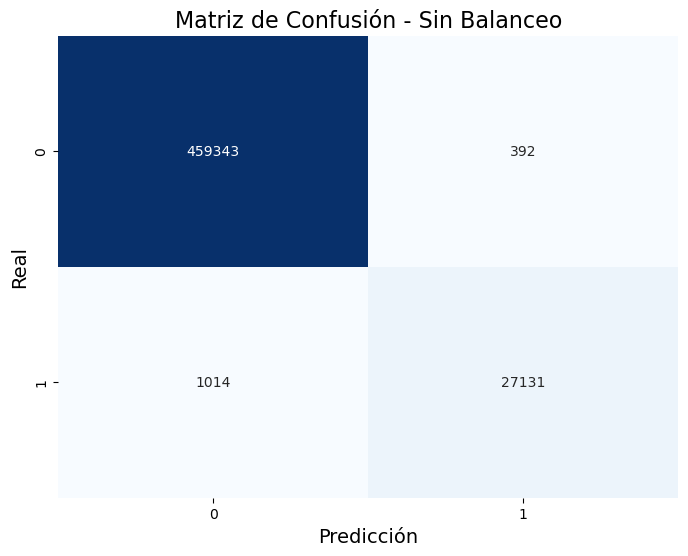

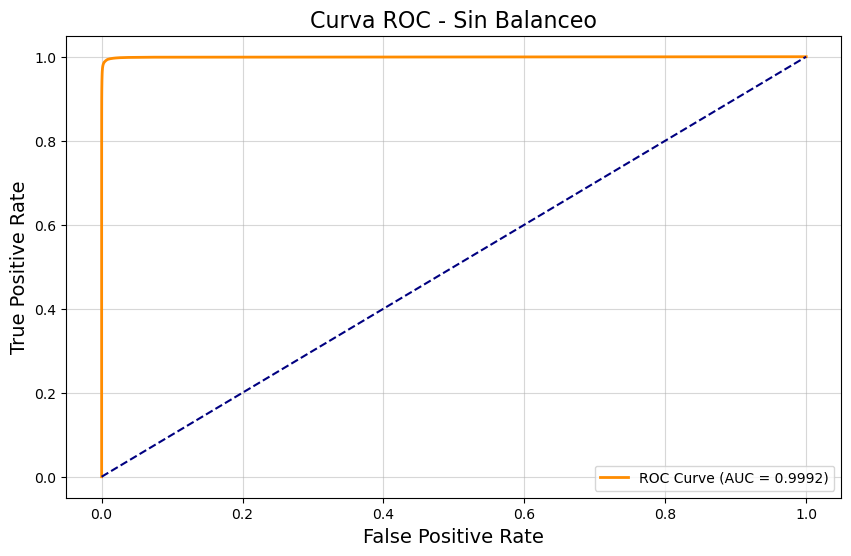


Medidas de rendimiento para SMOTE:
ROC-AUC: 0.9994
Precision: 0.9641
Recall: 0.9777
F1-Score: 0.9708
Accuracy: 0.9966

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9986  0.9978    0.9982  459735.0000
1                0.9641  0.9777    0.9708   28145.0000
accuracy         0.9966  0.9966    0.9966       0.9966
macro avg        0.9814  0.9877    0.9845  487880.0000
weighted avg     0.9966  0.9966    0.9966  487880.0000


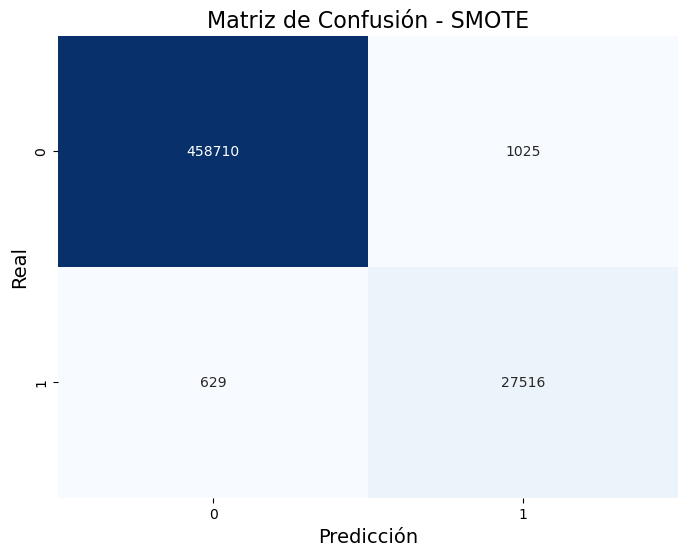

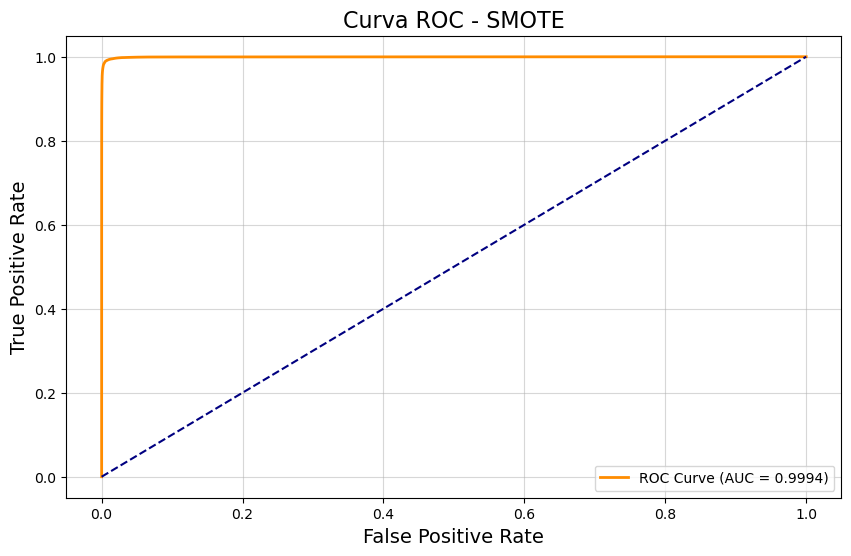


Medidas de rendimiento para SMOTE-Tomek:
ROC-AUC: 0.9994
Precision: 0.9643
Recall: 0.9770
F1-Score: 0.9706
Accuracy: 0.9966

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9986  0.9978    0.9982  459735.0000
1                0.9643  0.9770    0.9706   28145.0000
accuracy         0.9966  0.9966    0.9966       0.9966
macro avg        0.9814  0.9874    0.9844  487880.0000
weighted avg     0.9966  0.9966    0.9966  487880.0000


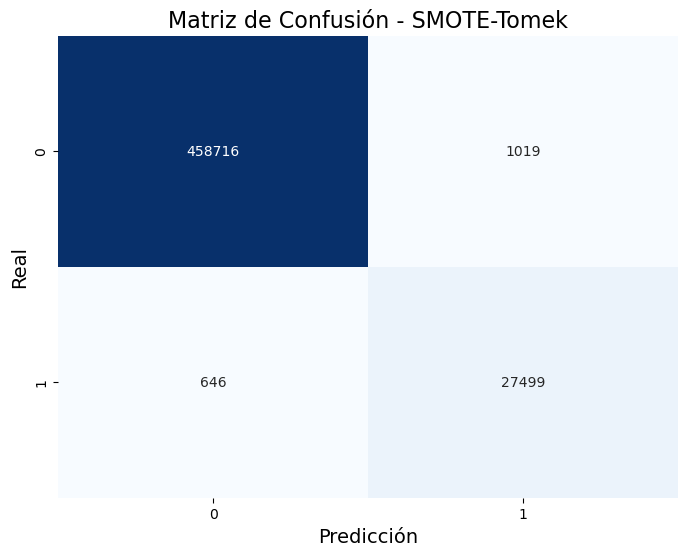

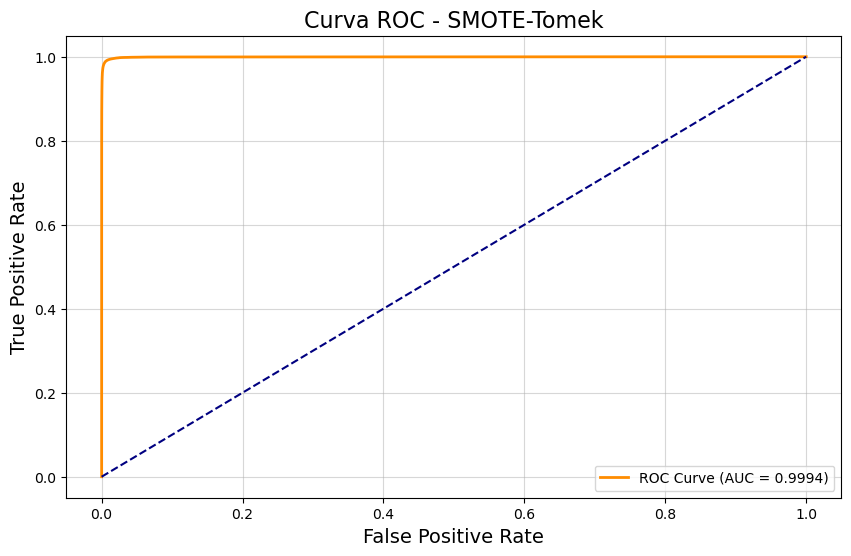


Comparativa de Técnicas de Balanceo:
               roc_auc  precision    recall        f1  accuracy
Sin Balanceo  0.999167   0.985757  0.963972  0.974743  0.997118
SMOTE         0.999391   0.964087  0.977651  0.970822  0.996610
SMOTE-Tomek   0.999354   0.964268  0.977047  0.970616  0.996587


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    auc,
    f1_score, 
    accuracy_score, 
    precision_score, 
    recall_score
)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Configuraciones de semilla para reproducibilidad
np.random.seed(42)

# Cargar dataset
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Dividir el conjunto de datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Función para entrenar, predecir y evaluar modelo
def evaluar_modelo(X_train_balanceado, y_train_balanceado, X_test, y_test, nombre_tecnica):
    # Entrenar Random Forest
    clf_rf = RandomForestClassifier(
        random_state=42,
        n_estimators=100,
        max_depth=None,
        min_samples_split=2
    )
    clf_rf.fit(X_train_balanceado, y_train_balanceado)
    
    # Predicciones
    y_pred_rf = clf_rf.predict(X_test)
    y_pred_proba_rf = clf_rf.predict_proba(X_test)[:, 1]
    
    # Calcular métricas
    roc_auc = auc(*roc_curve(y_test, y_pred_proba_rf)[:2])
    recall = recall_score(y_test, y_pred_rf)
    precision = precision_score(y_test, y_pred_rf)
    f1 = f1_score(y_test, y_pred_rf)
    accuracy = accuracy_score(y_test, y_pred_rf)
    
    print(f"\nMedidas de rendimiento para {nombre_tecnica}:")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Reporte de Clasificación
    print("\nReporte de Clasificación:")
    reporte = classification_report(y_test, y_pred_rf, output_dict=True)
    reporte_redondeado = pd.DataFrame(reporte).transpose().round(4)
    print(reporte_redondeado)
    
    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred_rf)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusión - {nombre_tecnica}", fontsize=16)
    plt.xlabel("Predicción", fontsize=14)
    plt.ylabel("Real", fontsize=14)
    plt.show()
    
    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="darkorange", lw=2)
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.xlabel("False Positive Rate", fontsize=14)
    plt.ylabel("True Positive Rate", fontsize=14)
    plt.title(f"Curva ROC - {nombre_tecnica}", fontsize=16)
    plt.legend(loc="lower right")
    plt.grid(alpha=0.5)
    plt.show()
    
    return {
        'roc_auc': roc_auc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'accuracy': accuracy
    }

# 1. Sin balanceo
resultados_sin_balanceo = evaluar_modelo(X_train, y_train, X_test, y_test, 'Sin Balanceo')

# 2. Con SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
resultados_smote = evaluar_modelo(X_train_smote, y_train_smote, X_test, y_test, 'SMOTE')

# 3. Con SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)
resultados_smote_tomek = evaluar_modelo(X_train_smote_tomek, y_train_smote_tomek, X_test, y_test, 'SMOTE-Tomek')

# Comparativa de resultados
comparativa = pd.DataFrame([
    resultados_sin_balanceo,
    resultados_smote,
    resultados_smote_tomek
], index=['Sin Balanceo', 'SMOTE', 'SMOTE-Tomek'])
print("\nComparativa de Técnicas de Balanceo:")
print(comparativa)

MEJORES HIPERPARAMETROS

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# Cargar dataset
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Definir el espacio de búsqueda de hiperparámetros
param_distributions = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [None] + list(range(10, 31, 5)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'bootstrap': [True]
}

# Configurar el modelo base
model = RandomForestClassifier(random_state=42)

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=30,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Realizar la búsqueda
print("Iniciando búsqueda de hiperparámetros...")
random_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y score
print("\nMejores parámetros encontrados:")
for param, value in random_search.best_params_.items():
    print(f"{param}: {value}")
print(f"\nMejor score (ROC-AUC): {random_search.best_score_:.4f}")

# Entrenar el modelo con los mejores parámetros
best_model = RandomForestClassifier(**random_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calcular métricas
print("\nMétricas en conjunto de prueba:")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Guardar los mejores parámetros
pd.DataFrame([random_search.best_params_]).to_csv('D:/Tesis/Definitivos/nuevo/mejores_parametros_rf.csv', index=False)

Iniciando búsqueda de hiperparámetros...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Mejores parámetros encontrados:
n_estimators: 900
min_samples_split: 2
min_samples_leaf: 2
max_features: sqrt
max_depth: 30
class_weight: balanced
bootstrap: True

Mejor score (ROC-AUC): 0.9996

Métricas en conjunto de prueba:
ROC-AUC: 0.9996
Precision: 0.9801
Recall: 0.9669
F1-Score: 0.9735
Accuracy: 0.9970


## RANDOM FOREST - CROSS VALIDATION

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# Cargar dataset
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Mejores hiperparámetros encontrados
best_params = {
    'n_estimators': 900,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'max_depth': 30,
    'class_weight': 'balanced',
    'bootstrap': True,
    'random_state': 42
}

# Preparar KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listas para almacenar resultados
train_scores = []
val_scores = []

print(f"Iniciando validación cruzada con {n_splits} folds...")

# Realizar validación cruzada
for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"\nFold {fold}/{n_splits}")
    
    # Dividir datos
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # Crear y entrenar modelo
    model = RandomForestClassifier(**best_params)
    model.fit(X_train, y_train)
    
    # Predicciones
    train_pred = model.predict(X_train)
    train_pred_proba = model.predict_proba(X_train)[:, 1]
    
    val_pred = model.predict(X_val)
    val_pred_proba = model.predict_proba(X_val)[:, 1]
    
    # Calcular métricas
    train_metrics = {
        'roc_auc': roc_auc_score(y_train, train_pred_proba),
        'precision': precision_score(y_train, train_pred),
        'recall': recall_score(y_train, train_pred),
        'f1': f1_score(y_train, train_pred),
        'accuracy': accuracy_score(y_train, train_pred)
    }
    
    val_metrics = {
        'roc_auc': roc_auc_score(y_val, val_pred_proba),
        'precision': precision_score(y_val, val_pred),
        'recall': recall_score(y_val, val_pred),
        'f1': f1_score(y_val, val_pred),
        'accuracy': accuracy_score(y_val, val_pred)
    }
    
    train_scores.append(train_metrics)
    val_scores.append(val_metrics)
    
    print("\nMétricas de entrenamiento:")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    print("\nMétricas de validación:")
    for metric, value in val_metrics.items():
        print(f"{metric}: {value:.4f}")

# Calcular promedios y desviaciones estándar
train_means = pd.DataFrame(train_scores).mean()
train_stds = pd.DataFrame(train_scores).std()
val_means = pd.DataFrame(val_scores).mean()
val_stds = pd.DataFrame(val_scores).std()

# Crear DataFrame para el resumen
summary_data = {
    'Train Mean': train_means,
    'Train Std': train_stds,
    'Val Mean': val_means,
    'Val Std': val_stds,
    'Diff (Train-Val)': train_means - val_means
}

summary_df = pd.DataFrame(summary_data).round(4)

print("\nResumen de validación cruzada:")
print(summary_df)

# Guardar resultados
summary_df.to_csv('rf_cross_validation_results.csv')

# Evaluar overfitting
print("\nEvaluación de overfitting:")
for metric in train_means.index:
    diff = train_means[metric] - val_means[metric]
    print(f"\n{metric}:")
    print(f"Diferencia Train-Val: {abs(diff):.4f}")
    if abs(diff) > 0.02:
        print("Posible overfitting detectado")
    else:
        print("No hay evidencia de overfitting")

Iniciando validación cruzada con 5 folds...

Fold 1/5

Métricas de entrenamiento:
roc_auc: 1.0000
precision: 0.9915
recall: 1.0000
f1: 0.9958
accuracy: 0.9995

Métricas de validación:
roc_auc: 0.9997
precision: 0.9799
recall: 0.9717
f1: 0.9758
accuracy: 0.9972

Fold 2/5

Métricas de entrenamiento:
roc_auc: 1.0000
precision: 0.9920
recall: 1.0000
f1: 0.9960
accuracy: 0.9995

Métricas de validación:
roc_auc: 0.9994
precision: 0.9797
recall: 0.9683
f1: 0.9740
accuracy: 0.9970

Fold 3/5

Métricas de entrenamiento:
roc_auc: 1.0000
precision: 0.9919
recall: 1.0000
f1: 0.9959
accuracy: 0.9995

Métricas de validación:
roc_auc: 0.9995
precision: 0.9770
recall: 0.9653
f1: 0.9712
accuracy: 0.9967

Fold 4/5

Métricas de entrenamiento:
roc_auc: 1.0000
precision: 0.9918
recall: 1.0000
f1: 0.9959
accuracy: 0.9995

Métricas de validación:
roc_auc: 0.9996
precision: 0.9801
recall: 0.9678
f1: 0.9739
accuracy: 0.9970

Fold 5/5

Métricas de entrenamiento:
roc_auc: 1.0000
precision: 0.9915
recall: 1.0000
f

Cargando datos...
Preparando datos...
Entrenando modelo...
Calculando métricas...

Comparación de Métricas:
     Métrica  Dataset Prueba (Original)  Dataset Real  Desvío
0   Accuracy                     0.9970        0.9963  0.0007
1  Precision                     0.9801        0.9732  0.0069
2     Recall                     0.9669        0.9752  0.0083
3   F1-Score                     0.9735        0.9742  0.0007
4    ROC-AUC                     0.9996        0.9996  0.0000

Generando visualizaciones...


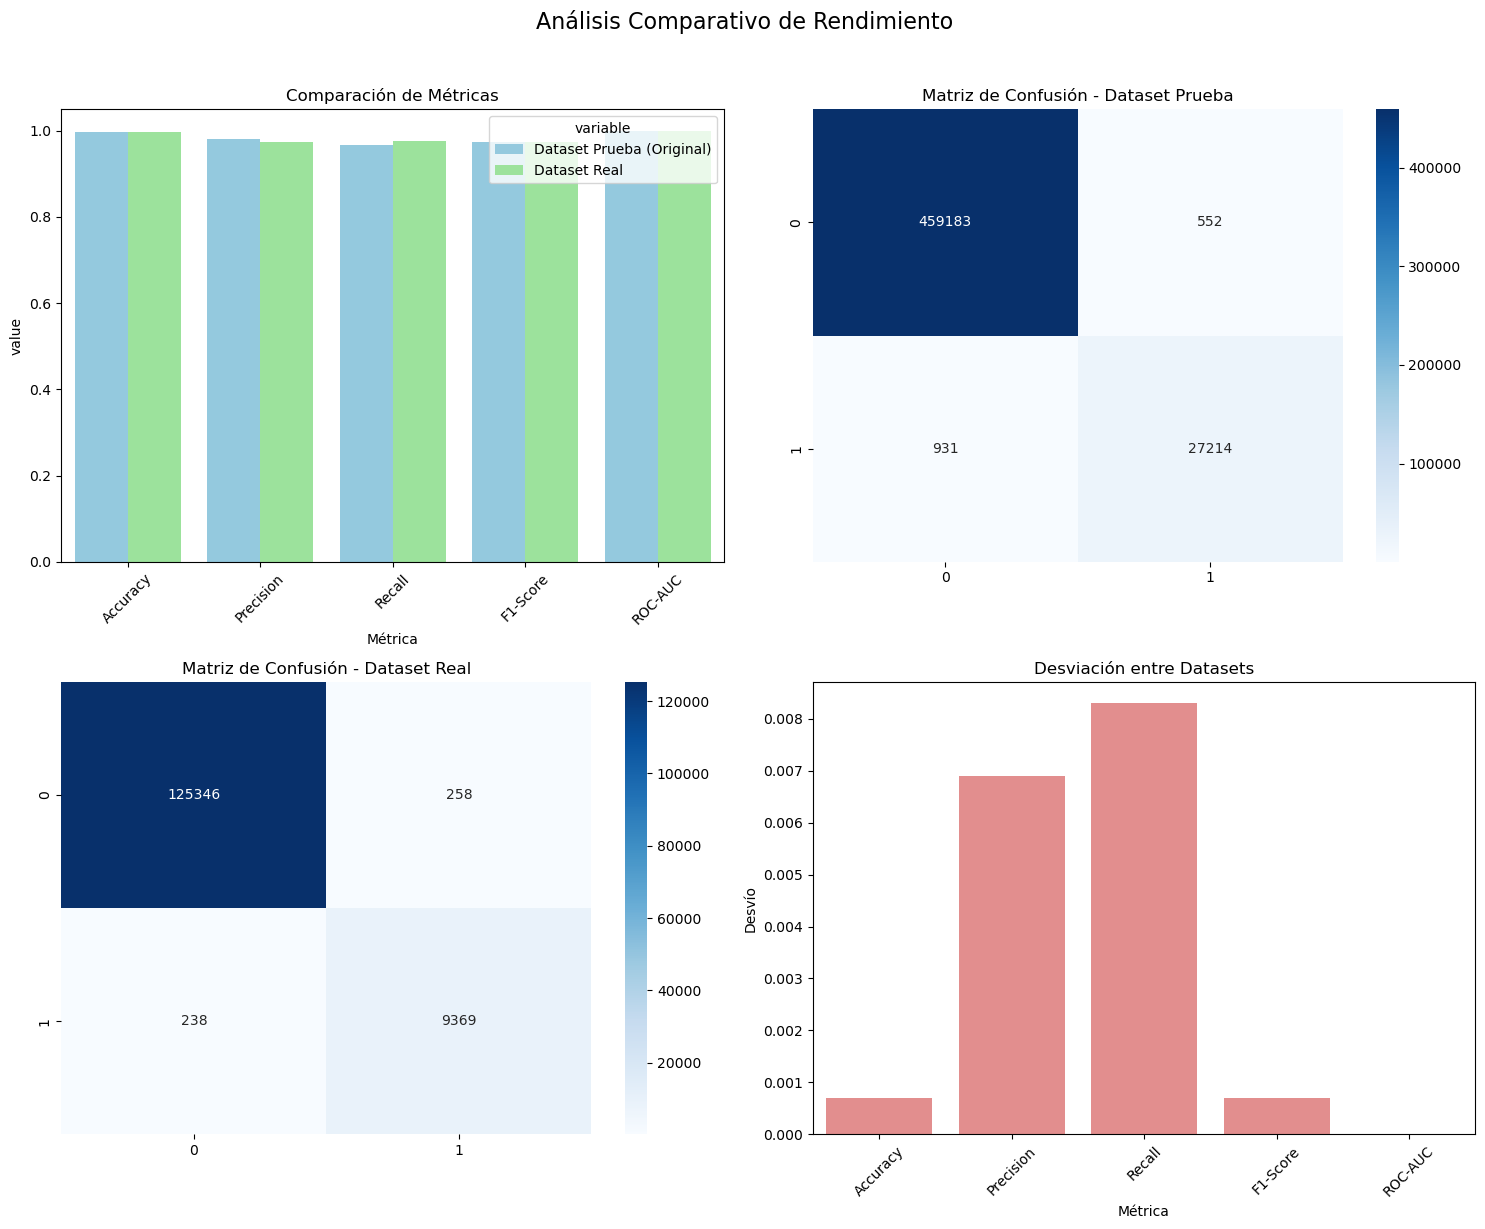

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
   roc_auc_score, recall_score, f1_score,
   accuracy_score, precision_score, confusion_matrix
)
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Optimizar la lectura de datos usando dtypes específicos
print("Cargando datos...")
dtypes = {
   'Morosidad': 'int8'  # Asumiendo que Morosidad es binaria
   # Aquí podrías agregar más columnas con sus tipos específicos
}

df_mora_prestamos_original = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv', dtype=dtypes)
nuevo_dataset = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales_012024.csv', dtype=dtypes)

# Separar características y variable objetivo eficientemente
X_original = df_mora_prestamos_original.drop('Morosidad', axis=1)
y_original = df_mora_prestamos_original['Morosidad'].values  # Convertir a numpy array
X_nuevo = nuevo_dataset.drop('Morosidad', axis=1)
y_nuevo = nuevo_dataset['Morosidad'].values  # Convertir a numpy array

# Limpiar memoria
del df_mora_prestamos_original
del nuevo_dataset

# Asegurar nombres consistentes
X_original.columns = X_original.columns.str.replace(' ', '_')
X_nuevo.columns = X_nuevo.columns.str.replace(' ', '_')

print("Preparando datos...")
X_train, X_test, y_train, y_test = train_test_split(
   X_original, y_original, test_size=0.3, stratify=y_original, random_state=42
)

# Limpiar más memoria
del X_original
del y_original

# Mantener los mejores hiperparámetros
modelo = RandomForestClassifier(
   n_estimators=900,
   max_depth=30,
   min_samples_split=2,
   min_samples_leaf=2,
   max_features='sqrt',
   class_weight='balanced',
   bootstrap=True,
   random_state=42,
   n_jobs=-1,  # Usar paralelización
   verbose=0   # Mostrar progreso
)

print("Entrenando modelo...")
modelo.fit(X_train, y_train)

def calcular_metricas(modelo, X, y):
   # Calcular predicciones en lotes si el dataset es muy grande
   batch_size = 10000
   n_samples = len(X)
   y_pred = np.zeros(n_samples)
   y_pred_proba = np.zeros(n_samples)
   
   for i in range(0, n_samples, batch_size):
       end = min(i + batch_size, n_samples)
       batch_pred = modelo.predict(X[i:end])
       batch_pred_proba = modelo.predict_proba(X[i:end])[:, 1]
       y_pred[i:end] = batch_pred
       y_pred_proba[i:end] = batch_pred_proba
   
   return {
       'Accuracy': round(accuracy_score(y, y_pred), 4),
       'Precision': round(precision_score(y, y_pred), 4),
       'Recall': round(recall_score(y, y_pred), 4),
       'F1-Score': round(f1_score(y, y_pred), 4),
       'ROC-AUC': round(roc_auc_score(y, y_pred_proba), 4)
   }

print("Calculando métricas...")
metricas_test = calcular_metricas(modelo, X_test, y_test)
metricas_nuevo = calcular_metricas(modelo, X_nuevo, y_nuevo)

# Crear DataFrame de comparación
comparacion_metricas = pd.DataFrame({
   'Métrica': list(metricas_test.keys()),
   'Dataset Prueba (Original)': list(metricas_test.values()),
   'Dataset Real': list(metricas_nuevo.values()),
   'Desvío': [round(abs(metricas_test[m] - metricas_nuevo[m]), 4) for m in metricas_test]
})

print("\nComparación de Métricas:")
print(comparacion_metricas)

print("\nGenerando visualizaciones...")
# Crear una sola figura con todos los plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis Comparativo de Rendimiento', fontsize=16, y=1.02)

# 1. Gráfico de barras - Métricas
sns.barplot(
   data=comparacion_metricas.melt(
       id_vars='Métrica', 
       value_vars=['Dataset Prueba (Original)', 'Dataset Real']
   ),
   x='Métrica',
   y='value',
   hue='variable',
   palette=['skyblue', 'lightgreen'],
   ax=axes[0,0]
)
axes[0,0].set_title('Comparación de Métricas')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Matriz de confusión - Dataset Prueba
cm_test = confusion_matrix(y_test, modelo.predict(X_test))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[0,1])
axes[0,1].set_title('Matriz de Confusión - Dataset Prueba')

# 3. Matriz de confusión - Dataset Nuevo
cm_nuevo = confusion_matrix(y_nuevo, modelo.predict(X_nuevo))
sns.heatmap(cm_nuevo, annot=True, fmt='d', cmap='Blues', ax=axes[1,0])
axes[1,0].set_title('Matriz de Confusión - Dataset Real')

# 4. Gráfico de desviaciones
sns.barplot(
   data=comparacion_metricas,
   x='Métrica',
   y='Desvío',
   color='lightcoral',
   ax=axes[1,1]
)
axes[1,1].set_title('Desviación entre Datasets')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

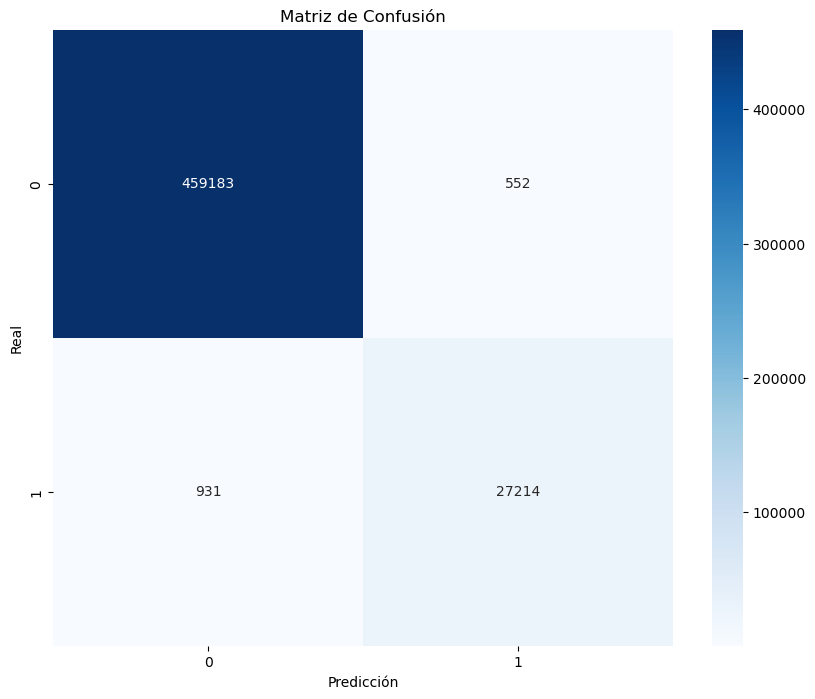


Métricas en conjunto de prueba:
ROC-AUC: 0.9996
Precision: 0.9801
Recall: 0.9669
F1-Score: 0.9735
Accuracy: 0.9970
Especificidad: 0.9988

Tiempo de ejecución: 0:12:49.763162


In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Iniciar el tiempo
start_time = datetime.now()

# Cargar los datos
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv', dtype=dtypes)

# Separar features y target
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Split de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Crear y entrenar el modelo
rf_model = RandomForestClassifier(
   n_estimators=900,
   min_samples_split=2,
   min_samples_leaf=2,
   max_features='sqrt',
   max_depth=30,
   class_weight='balanced',
   bootstrap=True,
   random_state=42,
   verbose=0,
   n_jobs=-1
)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calcular métricas
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
especificidad = tn / (tn + fp)

metrics = {
   'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
   'Precision': precision_score(y_test, y_pred),
   'Recall': recall_score(y_test, y_pred),
   'F1-Score': f1_score(y_test, y_pred),
   'Accuracy': accuracy_score(y_test, y_pred),
   'Especificidad': especificidad
}

# Calcular tiempo de ejecución
end_time = datetime.now()
execution_time = end_time - start_time

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

# Imprimir métricas y tiempo de ejecución
print('\nMétricas en conjunto de prueba:')
for metric, value in metrics.items():
   print(f'{metric}: {value:.4f}')

print(f'\nTiempo de ejecución: {execution_time}')